The aim of this assignment is to process and clean the dataset, generate visualizations, and <br/>
**derive insights from the Algerian forest fire dataset by analyzing the Fire Weather Index (FWI)**.<br/>
This analysis will involve utilizing multiple linear regression, polynomial regression, and regularization models.<br/> Additionally, the assignment will include performing cross-validation and hyperparameter tuning to evaluate the model's performance..<br/> 
After developing the model, you will create pickle files and test the model on unseen data.

Load Data

In [845]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [846]:
data = pd.read_csv('dataset/Algerian_forest_fires_cleaned.csv')
data.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


LOAD DATASET<br/>
Observations<br/>
This dataset is for Algerian Forest fire wherein it is in Mediterranean region.<br/>
The typical summer is from June to September which covers in the dataset for the year 2012.<br/>
Data is limited <br/>
Data is also has 2 Regions.


Check missing values

In [847]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

NO missing value

In [848]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [849]:
data.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

Check the unique values of Classes since its the only object data type

In [850]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [851]:
#remove trailing whitespaces
data['Classes'] = data['Classes'].str.strip()

In [852]:
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [853]:
#convert the classes to numerical values

data['Classes'] = data['Classes'].map({'fire': 1, 'not fire': 0})

In [854]:
data['Classes'].unique()

array([0, 1], dtype=int64)

Visualize Data by Region

In [855]:
# Check the date range, since data has date and possibly model  can be time series
data['Date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Set the date as index
data.set_index('Date', inplace=True)

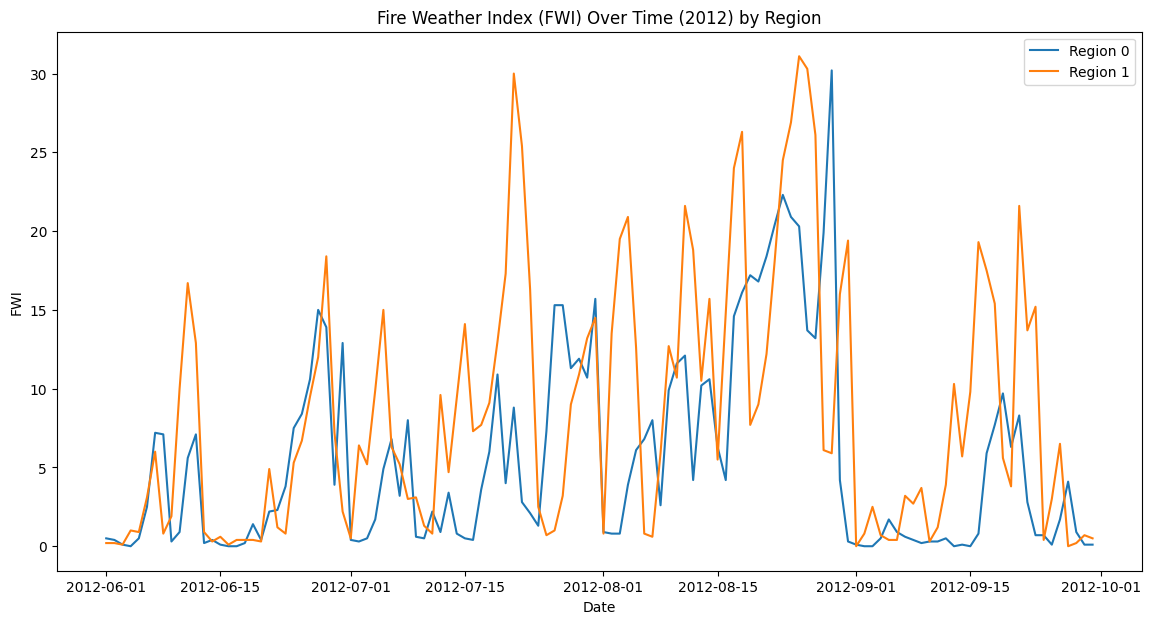

In [856]:
# Separate data by region
data_region0 = data[data['Region'] == 0]
data_region1 = data[data['Region'] == 1]

# Plot FWI for each region separately
plt.figure(figsize=(14, 7))

# Plot for Region 0
plt.plot(data_region0.index, data_region0['FWI'], label='Region 0')

# Plot for Region 1
plt.plot(data_region1.index, data_region1['FWI'], label='Region 1')

plt.title('Fire Weather Index (FWI) Over Time (2012) by Region')
plt.xlabel('Date')
plt.ylabel('FWI')
plt.legend()
plt.show()

Region 0 (blue line) and Region 1 (orange line) show fluctuating FWI values with multiple peaks and troughs.<br/>
The graph highlights the variability and intensity of fire weather conditions across two regions during 2012.<br/> It underscores the need for region-specific fire management strategies and continuous monitoring to mitigate the risks associated with high FWI values.


For now, I have decided not to remove any data that might be considered outliers. These potential outliers could represent significant spikes in the Fire Weather Index (FWI) or increases in wildfire incidents. It's crucial to retain these data points, as they are important for accurately analyzing and predicting FWI trends. By keeping all data, we ensure that our analysis reflects the full range of conditions, which is essential for developing robust predictive models and understanding the extreme variations that can impact fire risk.

Check for correlation

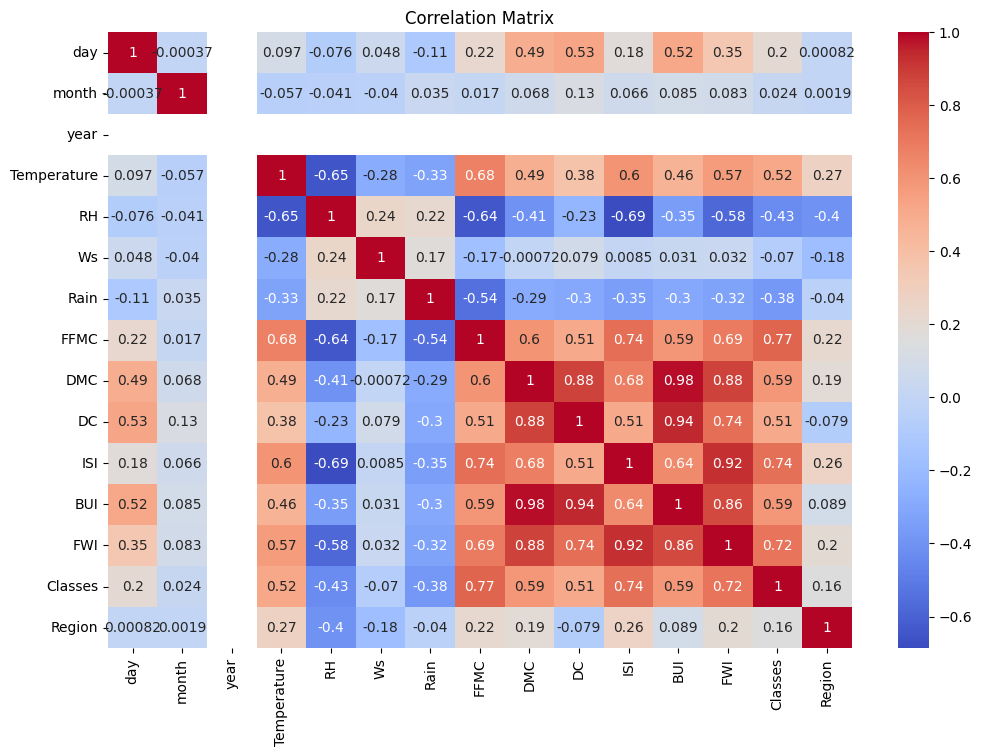

In [857]:
plt.figure(figsize=(12,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- FWI (Fire Weather Index) has strong positive correlations with:
    - FFMC (Fine Fuel Moisture Code): 0.92
    - ISI (Initial Spread Index): 0.86
    - DMC (Duff Moisture Code): 0.68
    - DC (Drought Code): 0.57
    - BUI (Buildup Index): 0.61
- Moderate correlations exist between FWI and Temperature (0.42), and Wind Speed (Ws) (0.37).
- Negative correlation between FWI and Relative Humidity (RH) (-0.43), and a weak negative correlation with Rain (-0.21).

In [858]:
# drop the year since all data are from 2012
data.drop('year', axis=1, inplace=True)

data.fillna(data.median(), inplace=True)

In [859]:
data.head(5)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Date,,,,,,,,,,,,,,
2012-06-01,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
2012-06-02,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2012-06-03,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
2012-06-04,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
2012-06-05,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


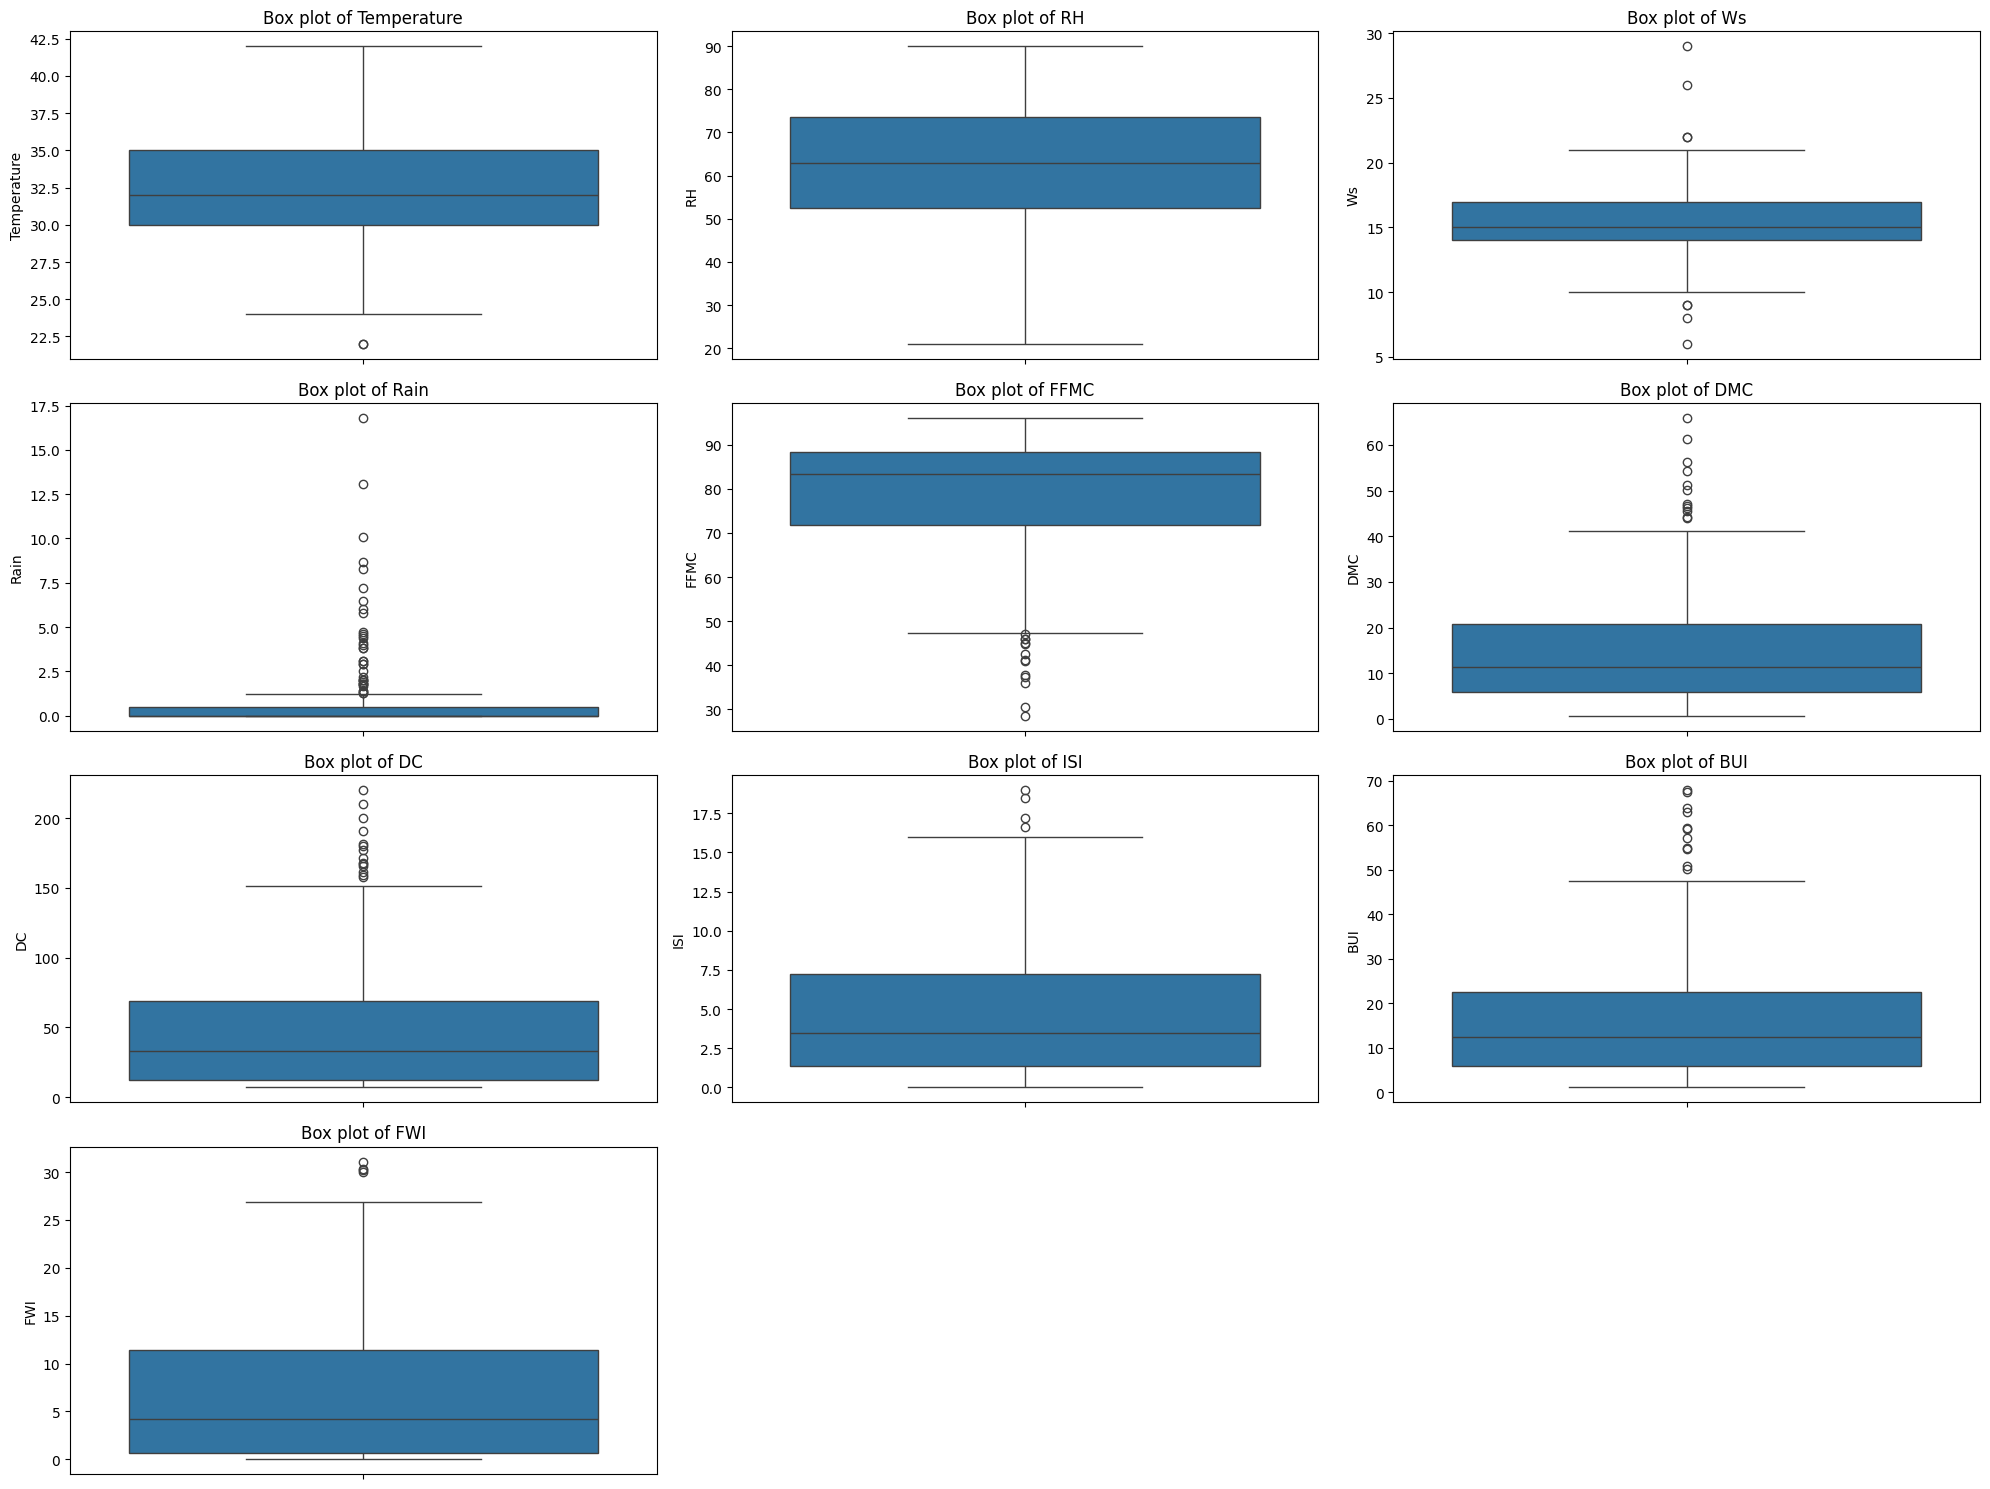

In [860]:

# Box plots for numerical features Observe the Spread and Identify Any Outliers
# But As i said above i will not remove outliers
# List of numerical columns
num_cols = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

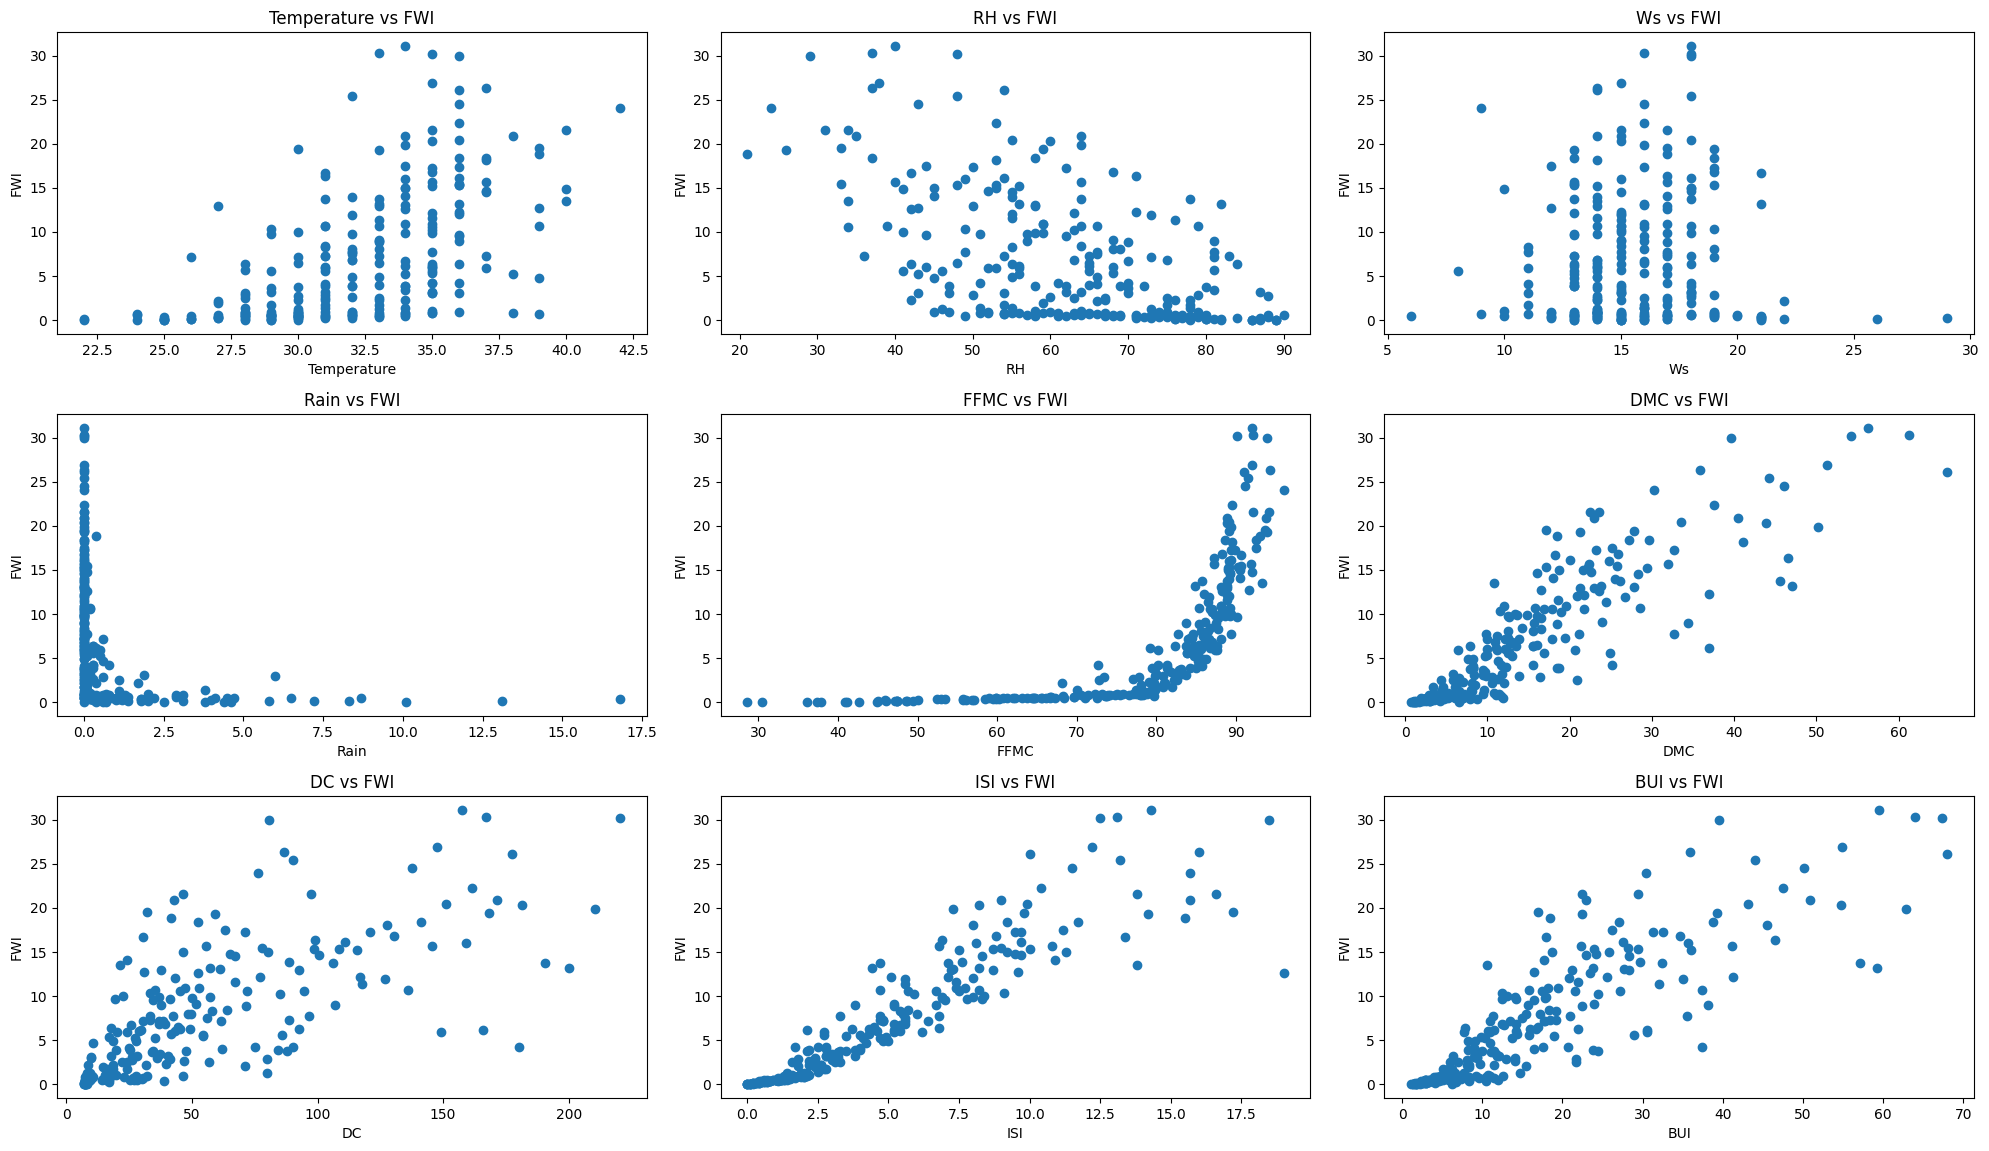

In [861]:
# Scatter plots to visualize relationships between key features and FWI
plt.figure(figsize=(20, 15))

for i, col in enumerate(num_cols[:-1]):  # Exclude FWI itself
    plt.subplot(4, 3, i+1)
    plt.scatter(data[col], data['FWI'])
    plt.xlabel(col)
    plt.ylabel('FWI')
    plt.title(f'{col} vs FWI')

plt.tight_layout()
plt.show()

This suggests that FFMC is a significant predictor of FWI.<br/><br/>
A scatter plot of FFMC vs. FWI might show a strong positive linear relationship, indicating that higher FFMC values are associated with higher FWI values.

Feature Engineering

In [862]:
# Checking for the Standard Scaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

scaled_data = pd.DataFrame(scaled_features, columns=data.columns)
print(scaled_data.head(5))

#But let check us not scale yet


        day     month  Temperature        RH        Ws      Rain      FFMC  \
0 -1.672796 -1.350168    -0.870655 -0.340673  0.893277 -0.381657 -0.847927   
1 -1.559473 -1.350168    -0.870655 -0.070359 -0.888877  0.268642 -0.938709   
2 -1.446150 -1.350168    -1.699254  1.348788  2.319000  6.171355 -2.146802   
3 -1.332827 -1.350168    -1.975454  1.821837 -0.888877  0.868918 -3.438694   
4 -1.219504 -1.350168    -1.423054  1.010896  0.180416 -0.381657 -0.910776   

        DMC        DC       ISI       BUI       FWI   Classes    Region  
0 -0.912120 -0.879401 -0.830356 -0.936012 -0.880159 -1.136861 -0.995893  
1 -0.855520 -0.879401 -0.902720 -0.900798 -0.893626 -1.136861 -0.995893  
2 -0.984891 -0.889913 -1.071571 -0.985310 -0.934029 -1.136861 -0.995893  
3 -1.081920 -0.894117 -1.143935 -1.055737 -0.947497 -1.136861 -0.995893  
4 -0.944463 -0.740651 -0.854477 -0.900798 -0.880159 -1.136861 -0.995893  


In [863]:

# # Split the data X and y variables
# X = data.drop('FWI', axis=1)
# y = data['FWI']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [864]:
# Split the data X and y variables
X = scaled_data.drop('FWI', axis=1)
y = scaled_data['FWI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [865]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2 Score: 0.9888664426634421
MAE: 0.059012407899157154
MSE: 0.006120346746021313
RMSE: 0.07823264501486137


In [866]:
lr.coef_, lr.intercept_

(array([ 0.01343228,  0.00618186, -0.00502199, -0.02715051, -0.01062933,
        -0.00084221, -0.12348902,  0.10658697, -0.04078458,  0.65588139,
         0.40504919,  0.04129307, -0.02497043]),
 0.0004913432091955133)

In [867]:
for i, col in enumerate(X.columns):
    print(f'{col} : {lr.coef_[i]}')

day : 0.013432275012598607
month : 0.006181858736883872
Temperature : -0.005021989025440322
RH : -0.027150514673208608
Ws : -0.010629326541533849
Rain : -0.000842214970827827
FFMC : -0.12348902229224237
DMC : 0.10658696781577867
DC : -0.04078457770782344
ISI : 0.6558813904689039
BUI : 0.4050491878275172
Classes : 0.04129307152217539
Region : -0.024970431989426205


In [868]:
#possible to drop the day, temperature, RH,Ws and Rain

In [869]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Scaled data
X_df = pd.DataFrame(X, columns=X.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data)


        feature         VIF
0           day    1.487548
1         month    1.094968
2   Temperature    2.421816
3            RH    3.205144
4            Ws    1.334699
5          Rain    1.577687
6          FFMC    4.952404
7           DMC   85.353688
8            DC   25.416664
9           ISI    5.008219
10          BUI  165.923951
11      Classes    3.444546
12       Region    1.616323


In [870]:
# Identify features with VIF values above a certain threshold. Common thresholds are 5 or 10, indicating potential multicollinearity problems.
#Remove the feature with the highest VIF value, recalculate VIFs, and repeat the process until all remaining features have acceptable VIF values.
drop_cols = ['BUI', 'DMC', 'DC']
X.drop(drop_cols, axis=1, inplace=True)

In [871]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Scaled data
X_df = pd.DataFrame(X, columns=X.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data)

       feature       VIF
0          day  1.072939
1        month  1.033355
2  Temperature  2.320585
3           RH  3.086571
4           Ws  1.293431
5         Rain  1.542468
6         FFMC  4.888162
7          ISI  3.959236
8      Classes  3.345056
9       Region  1.214055


In [872]:
X.head(5)

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,Classes,Region
0,-1.672796,-1.350168,-0.870655,-0.340673,0.893277,-0.381657,-0.847927,-0.830356,-1.136861,-0.995893
1,-1.559473,-1.350168,-0.870655,-0.070359,-0.888877,0.268642,-0.938709,-0.902720,-1.136861,-0.995893
2,-1.446150,-1.350168,-1.699254,1.348788,2.319000,6.171355,-2.146802,-1.071571,-1.136861,-0.995893
3,-1.332827,-1.350168,-1.975454,1.821837,-0.888877,0.868918,-3.438694,-1.143935,-1.136861,-0.995893
4,-1.219504,-1.350168,-1.423054,1.010896,0.180416,-0.381657,-0.910776,-0.854477,-1.136861,-0.995893


In [873]:
# Polynomial Regression
poly= PolynomialFeatures(degree=2, include_bias= False)
X_poly= poly.fit_transform(X)

In [874]:
X_tr_poly, X_te_poly, y_tr, y_te = train_test_split(X_poly, y, test_size=0.2, random_state=50)

In [875]:
lr.fit(X_tr_poly, y_tr)

LinearRegression()

In [876]:
y_pred_poly= lr.predict(X_te_poly)

In [877]:
print(f'R2 Score: {r2_score(y_test, y_pred_poly)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_poly)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_poly)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}')

R2 Score: -2.3371181113045574
MAE: 0.9759960161524187
MSE: 1.8344828482220041
RMSE: 1.354430820759039


In [878]:
%%time
from sklearn.linear_model import Ridge, Lasso, ElasticNet
rd=Ridge(alpha=0.001)

rd.fit(X_train, y_train)
y_pred_rd= rd.predict(X_test)

print(f'R2 Score: {r2_score(y_test, y_pred_rd)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rd)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rd)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rd))}')

R2 Score: 0.9888521601746072
MAE: 0.059035067938064005
MSE: 0.0061281981255421
RMSE: 0.07828280862068057
CPU times: total: 0 ns
Wall time: 6.91 ms


In [879]:
for i, col in enumerate(X.columns):
    print(f'{col} : {rd.coef_[i]}')

day : 0.013431363640146105
month : 0.00617682859005488
Temperature : -0.005027150638387208
RH : -0.027154998017164853
Ws : -0.010628439913575743
Rain : -0.0008347869707624398
FFMC : -0.12347015708699448
ISI : 0.10739337998082135
Classes : -0.04035700110290487
Region : 0.6558617795251349


In [880]:
ls=Lasso(alpha=0.09)

ls.fit(X_train, y_train)
y_pred_ls= ls.predict(X_test)

print(f'R2 Score: {r2_score(y_test, y_pred_ls)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_ls)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_ls)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ls))}')

R2 Score: 0.9666601231066044
MAE: 0.1073131863540152
MSE: 0.01832761990520555
RMSE: 0.13537954020163295


In [881]:
for i, col in enumerate(X.columns):
    print(f'{col} : {ls.coef_[i]}')

day : 0.0
month : 0.0
Temperature : 0.0
RH : -0.0
Ws : 0.0
Rain : -0.0
FFMC : 0.0
ISI : 0.17791370636220194
Classes : 0.0
Region : 0.5624484232636092


In [882]:
en=ElasticNet(alpha=0.09, l1_ratio=1)

en.fit(X_train, y_train)
y_pred_en= en.predict(X_test)

print(f'R2 Score: {r2_score(y_test, y_pred_en)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_en)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_en)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_en))}')

R2 Score: 0.9666601231066044
MAE: 0.1073131863540152
MSE: 0.01832761990520555
RMSE: 0.13537954020163295


In [883]:
for i, col in enumerate(X.columns):
    print(f'{col} : {en.coef_[i]}')

day : 0.0
month : 0.0
Temperature : 0.0
RH : -0.0
Ws : 0.0
Rain : -0.0
FFMC : 0.0
ISI : 0.17791370636220194
Classes : 0.0
Region : 0.5624484232636092


In [884]:
# apply cross validation
from sklearn.model_selection import cross_val_score

cvs= cross_val_score(lr, X, y, cv=5)
cvs.mean()

0.699978186114335

Decision Tree

In [885]:
dt = pd.read_csv('dataset/Algerian_forest_fires_cleaned.csv')
dt.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [886]:
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [887]:
dt['Classes'] = dt['Classes'].str.strip()
dt.drop('year', axis=1, inplace=True)
dt.head(5)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [888]:
X_dt = dt.drop('Classes', axis=1)
y_dt = dt['Classes']

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

In [889]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf_tree=DecisionTreeClassifier()

In [890]:
clf_tree.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier()

In [891]:
y_train_dt.value_counts()

Classes
fire        110
not fire     84
Name: count, dtype: int64

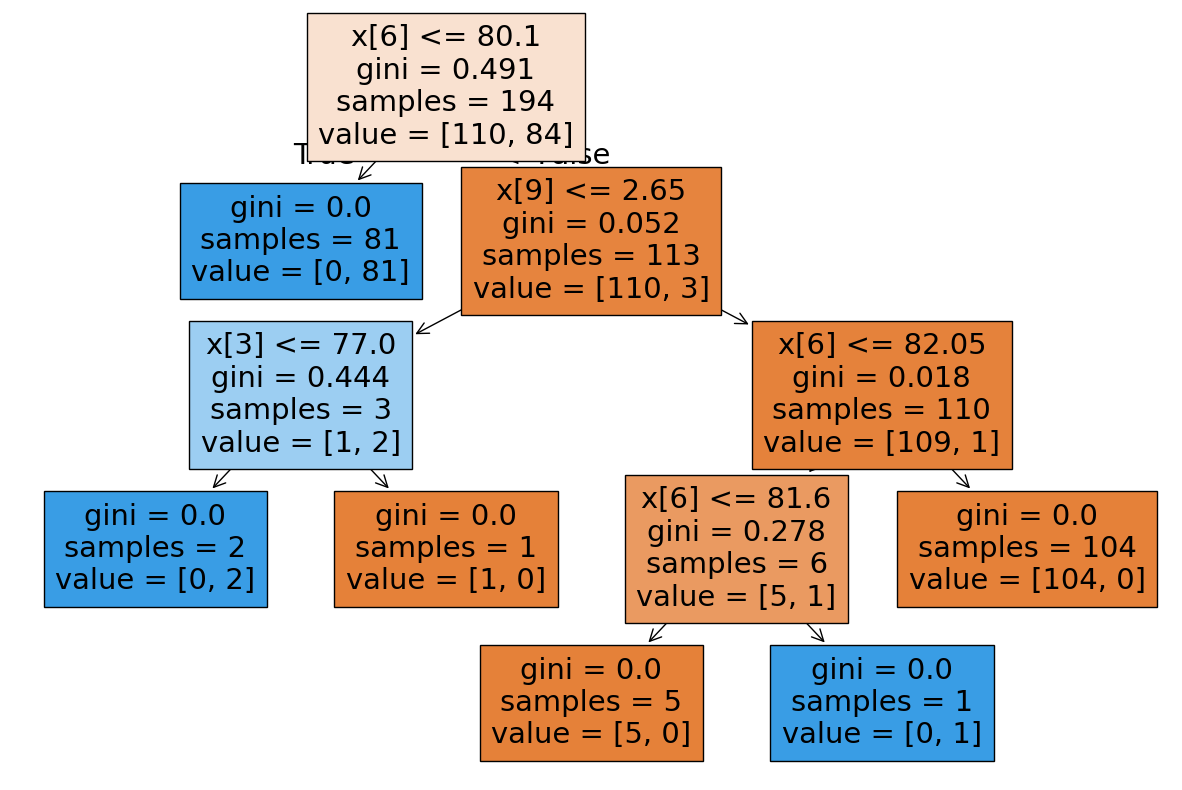

In [892]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(clf_tree, filled=True)
plt.show()

In [893]:
y_pred_dt= clf_tree.predict(X_test_dt)

In [894]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test_dt, y_pred_dt)

1.0

In [895]:
confusion_matrix(y_test_dt, y_pred_dt)

array([[27,  0],
       [ 0, 22]], dtype=int64)

In [896]:
clf_tree_pp=DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf_tree_pp.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

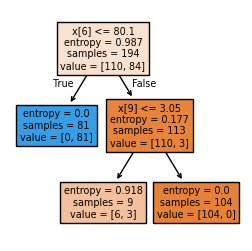

In [914]:
from sklearn.tree import plot_tree
plt.figure(figsize=(3,3))
plot_tree(clf_tree_pp, filled=True)
plt.show()

In [ ]:
y_pred_dt_pp= clf_tree_pp.predict(X_test_dt)
accuracy_score(y_test_dt, y_pred_dt_pp)

In [916]:
# Tuning Using Hyperparameter
parameter={'criterion':["gini", "entropy"],
           'max_depth':[1,2,3],
           'max_features':['sqrt', 'log2']
           }

In [917]:
grid=GridSearchCV(clf_tree, param_grid=parameter, cv=3)
grid.fit(X_train_dt, y_train_dt)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2']})

In [918]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt'}

In [919]:
y_pred_dt_grid= grid.predict(X_test_dt)
accuracy_score(y_test_dt, y_pred_dt_grid)

0.9795918367346939

In [920]:
confusion_matrix(y_test_dt, y_pred_dt_grid)

array([[26,  1],
       [ 0, 22]], dtype=int64)

In [922]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_dt, y_train_dt)

LogisticRegression(max_iter=1000)

In [923]:
y_pred_log = log_reg.predict(X_test_dt)
accuracy_score(y_test_dt, y_pred_log)

0.9591836734693877

In [924]:
import pickle
pickle.dump(lr, open('model.pkl', 'wb'))